# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 2. Модели Data Science

### Загрузка библиотек

In [1]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

### 1. Подготовка и предобработка данных

Исходный датасет

In [2]:
# Загрузка в объект DataFrame файла X_bp.xlsx, метод read_excel
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
# Определение количества строк и столбцов объекта, метод shape
x_bp.shape

(1023, 10)

In [4]:
# Вывод сведений об объекте DataFrame, метод info()
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [5]:
# Загрузка в объект DataFrame файла X_nup.xlsx, метод read_excel
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [6]:
# Определение количества строк и столбцов объекта, метод shape
x_nup.shape

(1040, 3)

In [7]:
# Вывод сведений об объекте DataFrame, метод info()
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [8]:
# соединение объектов DataFrame, метод merge, объединение по индексу, тип объединения INNER
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [9]:
# Вывод сведений о новом объекте DataFrame df, метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Вывод: соединение произведено по индексам, и часть данных была отброшена при соединении датасетов в общий новый датасет. Тип данных во всех колонках - float64.

In [10]:
# Изменение типа данных индекса, метод astype('int')
df.index = df.index.astype('int')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


Вывод: индексы - целые числа

In [11]:
# Проверка наличия пропусков типа NULL в объекте DataFrame, методы isnull() и sum()
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропуски в датасете отсутствуют.

In [12]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df.duplicated().sum()

0

Вывод: дубликаты в датасете отсутствуют

ПРЕДВАРИТЕЛЬНОЕ ЗАКЛЮЧЕНИЕ ПО ДАТАСЕТУ: датасет качественный: пропуски и дубликаты в датасете отсутствуют, вероятно он подвергался какой-то обработке заранее. 


Датасет представляет собой результаты испытаний на растяжение композитных материалов, тем не менее, данные, которые относятся к результатам замера геометрических параметров образцов, в нем отсутствуют. Восполним этот пробел и создадим соответствующие столбцы:

In [13]:
# Относительное удлинение при растяжении без нормирования 
df['Относительное удлинение при растяжении'] = df['Прочность при растяжении, МПа'] / df['Модуль упругости при растяжении, ГПа']

In [14]:
# относительное удлиненее без нормирования
df['Относительное удлинение'] = df['Прочность при растяжении, МПа'] / df['модуль упругости, ГПа']

In [15]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000,42.857143,4.060986
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000,42.857143,4.060986
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000,42.857143,4.060986
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000,42.857143,4.060986
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000,42.857143,3.984064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770,32.661939,2.615192
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790,32.369254,5.307442
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684,35.631624,6.388370
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074,27.980012,2.794045


In [16]:
# Проверка количества уникальных значений в каждом столбце датасета df, метод nunique()
df.nunique()

Соотношение матрица-наполнитель           1014
Плотность, кг/м3                          1013
модуль упругости, ГПа                     1020
Количество отвердителя, м.%               1005
Содержание эпоксидных групп,%_2           1004
Температура вспышки, С_2                  1003
Поверхностная плотность, г/м2             1004
Модуль упругости при растяжении, ГПа      1004
Прочность при растяжении, МПа             1004
Потребление смолы, г/м2                   1003
Угол нашивки, град                           2
Шаг нашивки                                989
Плотность нашивки                          988
Относительное удлинение при растяжении    1004
Относительное удлинение                   1020
dtype: int64

Вывод: в колонке 'Угол нашивки, град' всего два значения, в остальных столбцах гораздо больше, например в столбце 'модуль упругости, ГПа' таковых 1020 из 1023

In [17]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df['Угол нашивки, град'].unique()

array([ 0., 90.])

Вывод: категориальный параметр 'Угол нашивки, град' имеет всего два уровня, может рассматриваться как порядковый и для дальнейшей обработки подвергается ранжированию

In [18]:
# Подсчет количества строк по уникальным значениям столбца 'Угол нашивки, град', метод count()
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [19]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('float64')

In [20]:
#  Ранжирование переменной 'Угол нашивки, град' и изменение типа данных, метод astype('int')
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [21]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('int32')

In [22]:
# Вывод данных датасета df
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770,32.661939,2.615192
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790,32.369254,5.307442
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684,35.631624,6.388370
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074,27.980012,2.794045
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468,38.438169,6.844519


In [23]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Относительное удлинение при растяжении', 'Относительное удлинение'],
      dtype='object')

In [24]:
# Вывод сведений об объекте DataFrame df, метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Соотношение матрица-наполнитель         1023 non-null   float64
 1   Плотность, кг/м3                        1023 non-null   float64
 2   модуль упругости, ГПа                   1023 non-null   float64
 3   Количество отвердителя, м.%             1023 non-null   float64
 4   Содержание эпоксидных групп,%_2         1023 non-null   float64
 5   Температура вспышки, С_2                1023 non-null   float64
 6   Поверхностная плотность, г/м2           1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа    1023 non-null   float64
 8   Прочность при растяжении, МПа           1023 non-null   float64
 9   Потребление смолы, г/м2                 1023 non-null   float64
 10  Угол нашивки, град                      1023 non-null   int3

In [25]:
# Проверка количества уникальных значений в каждом столбце датасета df, метод nunique()
df.nunique()

Соотношение матрица-наполнитель           1014
Плотность, кг/м3                          1013
модуль упругости, ГПа                     1020
Количество отвердителя, м.%               1005
Содержание эпоксидных групп,%_2           1004
Температура вспышки, С_2                  1003
Поверхностная плотность, г/м2             1004
Модуль упругости при растяжении, ГПа      1004
Прочность при растяжении, МПа             1004
Потребление смолы, г/м2                   1003
Угол нашивки, град                           2
Шаг нашивки                                989
Плотность нашивки                          988
Относительное удлинение при растяжении    1004
Относительное удлинение                   1020
dtype: int64

In [26]:
# Описательная статистика датасета df, метод describe()
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929,33.704329,7.427613
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969,6.793861,41.155005
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000,13.098005,0.881994
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212,29.076471,2.485563
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920,33.602706,3.418615
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961,37.990668,4.876902
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901,55.351970,1090.580554


###### Построим графики рассеяния, распределия переменных и "ящики с усами"

In [27]:
# Попарные графики рассеяния
#sns.pairplot(df, height=3)

Попарные графики рассеяния не показывают какой-либо зависимости между параметрами

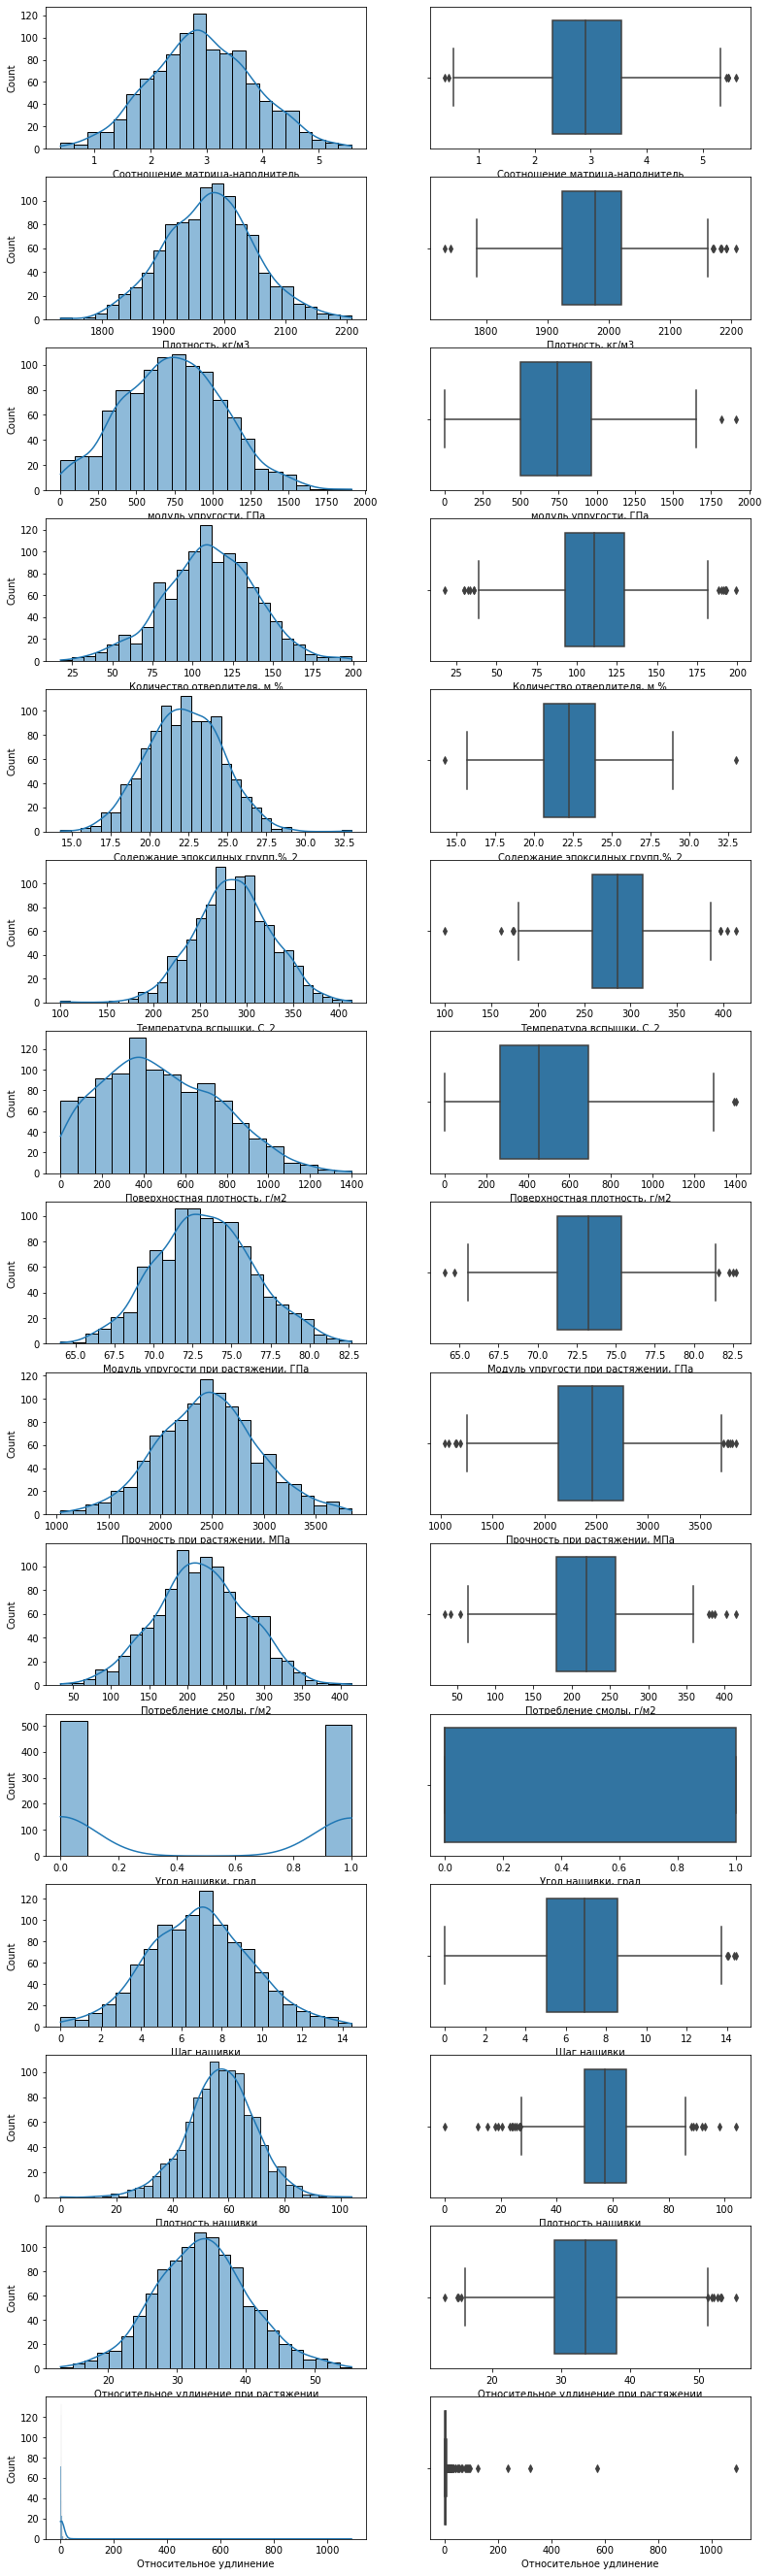

In [28]:
# Графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(15, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Вывод: на первый взгляд, судя по графикам распределения переменных, кроме 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Угол нашивки' распределения всех остальных параметров близки к нормальным. Судя по графикам рассеяния и графикам "ящики с усами", имеются выбросы.

Требуется дополнительно оценить нормальность распределения параметров по статистическому критерию и убрать существующие выбросы.

Требуется оценить также корреляцию параметров между собой, а для параметров, имеющих статистически значимую корреляцию, выполнить построение модели статистической регрессии и оценить ее статистическую адекватность.

###### Очистка данных от выбросов: 

Не производится с целью максимального сохранения данных

### 2. Нормализация значений параметров с помощью метода MinMaxScaler

In [29]:
# Загрузка MinMaxScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Применение  MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [31]:
# Описательная статистика нормализованного датасета df_norm
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838,0.491691,0.477768,0.549616,0.487678,0.006007
std,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875,0.500175,0.177519,0.118772,0.160786,0.037767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955,0.000000,0.351790,0.478890,0.378153,0.001472
50%,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875,0.000000,0.478940,0.551423,0.485273,0.002328
75%,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411,1.000000,0.594597,0.624537,0.589120,0.003666
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Попарные графики рассеяния после нормализации
# sns.pairplot(df_norm, height=3)

In [33]:
# Параметр 'Угол нашивки' - категориальный, поэтому его исключаем при построении матрицы корреляции по критерию Пирсона
df_dnorm=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки','Относительное удлинение при растяжении','Относительное удлинение']]
df_dnorm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.276998,0.548135,0.704292,0.002917
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998,0.576985,0.704292,0.002917
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998,0.673149,0.704292,0.002917
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.346248,0.451971,0.704292,0.002917
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.346248,0.548135,0.704292,0.002847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,0.628535,0.452161,0.463008,0.001591
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,0.731664,0.516890,0.456081,0.004061
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,0.288158,0.650355,0.533290,0.005053
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,0.437186,0.560262,0.352204,0.001755


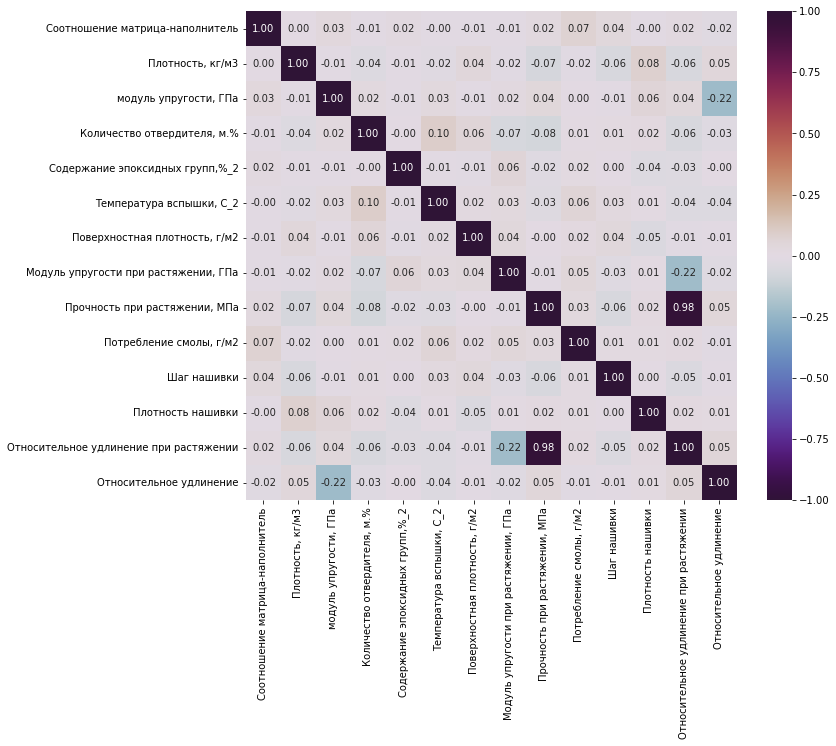

In [34]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

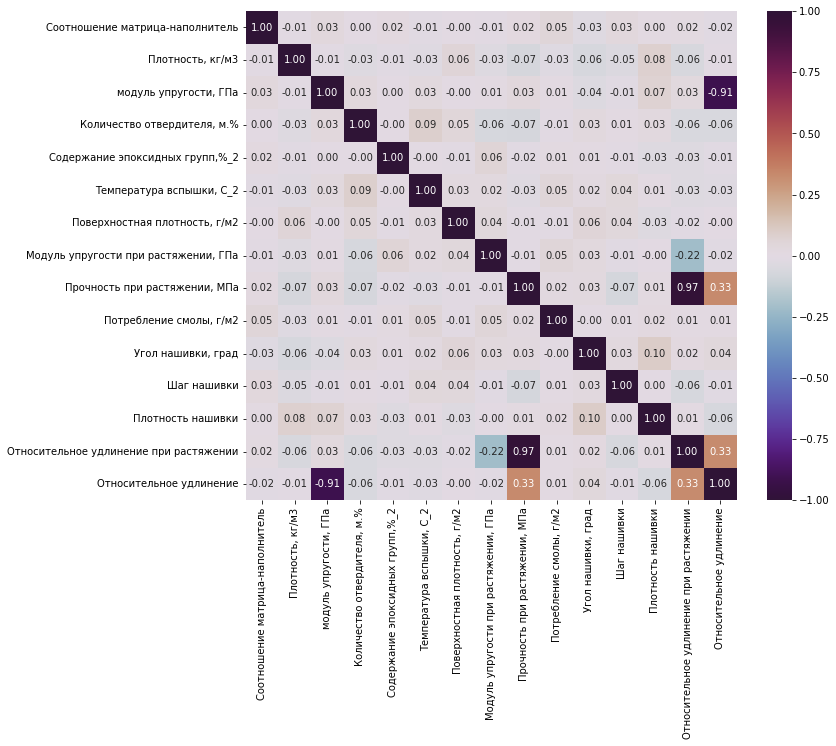

In [35]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # Спирмен
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрицам корреляции, построенной на основании корреляции по Пирсону для количественных данных и Спирмена для количественных и категориальных данных, коэффициенты корреляции
после очистки от выбросов и нормализации параметров мало изменились.

In [36]:
# Переименование и вывод датасета df_norm
df = df_norm
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Относительное удлинение при растяжении,Относительное удлинение
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135,0.704292,0.002917
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985,0.704292,0.002917
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149,0.704292,0.002917
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971,0.704292,0.002917
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135,0.704292,0.002847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161,0.463008,0.001591
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890,0.456081,0.004061
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355,0.533290,0.005053
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262,0.352204,0.001755


### 3. Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [37]:
# Загрузка модулей библиотеки sklearn для регрессоров и других библиотек
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Разбиение данных на обучающую и тестовую выборки

In [38]:
# Назначение переменных для создания моделей
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]
# Разбиение данных на обучающую и тестовую выборки
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=5)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=5)

###### Метод К ближайших соседей

In [39]:
# Регрессор KNeighborsRegressor() для расчета методом K-ближайших соседей,
# используются унифицированные веса и настройки алгоритма по умолчанию
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 61, 'weights': 'uniform'}

In [40]:
# Поиск по лучшей модели и вывод результатов для upr
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: 0.02


In [41]:
# Создание объекта pandas DataFrame()
models = pd.DataFrame()

In [42]:
# Запись результатов расчета в DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [43]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_upr_result])

In [44]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.02


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [45]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [46]:
# Поиск по лучшей модели и вывод результатов для pr
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: 0.697


In [47]:
# Запись результатов расчета в DataFrame()
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [48]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_pr_result])

In [49]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Стохастический градиентный спуск

In [50]:
# Регрессор SGDRegressor() для расчета методом стохастического градиентного спуска,
# используются настройки алгоритма по умолчанию
sgd = SGDRegressor()
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.0002,
 'epsilon': 0.01,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'penalty': 'l1'}

In [51]:
# Поиск по лучшей модели и вывод результатов для upr
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: 0.963
0.02219701815981433


In [52]:
# Запись результатов расчета в DataFrame()
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [53]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_upr_result])

In [54]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [55]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.002,
 'epsilon': 0.01,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'penalty': 'l1'}

In [56]:
# Поиск по лучшей модели и вывод результатов для pr
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: 0.998
0.0053846324214879785


In [57]:
# Запись результатов расчета в DataFrame()
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [58]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_pr_result])

In [59]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Линейная регрессия

In [60]:
# Регрессор LinearRegression() для расчета методом линейной регрессии,
# используются настройки алгоритма по умолчанию
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [61]:
# Поиск по лучшей модели и вывод результатов для upr
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: 0.961


In [62]:
# Запись результатов расчета в DataFrame()
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [63]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_upr_result])

In [64]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [65]:
# используется поиск по сетке GridSearchCV для pr
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [66]:
# Поиск по лучшей модели и вывод результатов для pr
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: 0.998


In [67]:
# Запись результатов расчета в DataFrame()
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [68]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_pr_result])

In [69]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Прочность при растяжении,LinearRegression_pr,0.005059,0.998


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

###### Случайный лес

In [70]:
# Регрессор RandomForestRegressor() для расчета методом случайного леса
# испальзуются настройки алгоритма по умолчанию
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
# Используется поиск по RandomizedSearchCV для upr
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 540,
 'min_samples_split': 30,
 'min_samples_leaf': 7,
 'max_depth': 6,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [71]:
# Поиск по лучшей модели и вывод результатов для upr
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: 0.545


In [72]:
# Запись результатов расчета в DataFrame()
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [73]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_upr_result])

In [74]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Прочность при растяжении,LinearRegression_pr,0.005059,0.998
Модуль упругости при растяжении,RandomForestRegressor_upr,0.087186,0.545


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

In [75]:
# Используется поиск по RandomizedSearchCV() для pr
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 960,
 'min_samples_split': 20,
 'min_samples_leaf': 7,
 'max_depth': 6,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [76]:
# Поиск по лучшей модели и вывод результатов для pr
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: 0.982


In [77]:
# Запись результатов расчета в DataFrame()
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [78]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_pr_result])

In [79]:
# Вывод результатов в кросс-таблицу
models 

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Прочность при растяжении,LinearRegression_pr,0.005059,0.998
Модуль упругости при растяжении,RandomForestRegressor_upr,0.087186,0.545
Прочность при растяжении,RandomForestRegressor_pr,0.014409,0.982


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Многослойный перцептрон

In [81]:
# Регрессор MLPRegressor() для расчета с помощью создания многослойного перцептрона
# используются настройки алгоритма
mlpr = MLPRegressor(random_state=5)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [82]:
# используется поиск по сетке GridSearchCV для upr
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (64, 32, 12),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'adam'}

In [83]:
# Поиск по лучшей модели и вывод результатов для upr
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: 0.935


In [84]:
# Запись результатов расчета в DataFrame()
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [85]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_upr_result])
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Прочность при растяжении,LinearRegression_pr,0.005059,0.998
Модуль упругости при растяжении,RandomForestRegressor_upr,0.087186,0.545
Прочность при растяжении,RandomForestRegressor_pr,0.014409,0.982
Модуль упругости при растяжении,MLPRegressor_upr,0.034593,0.935


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [86]:
# используется поиск по сетке GridSearchCV для pr
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (32, 32, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'adam'}

In [87]:
# Поиск по лучшей модели и вывод результатов для pr
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: 0.992


In [88]:
# Запись результатов расчета в DataFrame()
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [89]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_pr_result])
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Прочность при растяжении,LinearRegression_pr,0.005059,0.998
Модуль упругости при растяжении,RandomForestRegressor_upr,0.087186,0.545
Прочность при растяжении,RandomForestRegressor_pr,0.014409,0.982
Модуль упругости при растяжении,MLPRegressor_upr,0.034593,0.935
Прочность при растяжении,MLPRegressor_pr,0.010862,0.992


In [90]:
# Сортировка кросс- таблицы и вывод результатов
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

,Model,MAE,R2 score
Прочность при растяжении,LinearRegression_pr,0.005059,0.998
Прочность при растяжении,SGDRegressor_pr,0.005385,0.998
Прочность при растяжении,MLPRegressor_pr,0.010862,0.992
Прочность при растяжении,RandomForestRegressor_pr,0.014409,0.982
Модуль упругости при растяжении,LinearRegression_upr,0.021996,0.961
Модуль упругости при растяжении,SGDRegressor_upr,0.022197,0.963
Модуль упругости при растяжении,MLPRegressor_upr,0.034593,0.935
Прочность при растяжении,KNeighborsRegressor_pr,0.075181,0.697
Модуль упругости при растяжении,RandomForestRegressor_upr,0.087186,0.545
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.141031,0.020


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

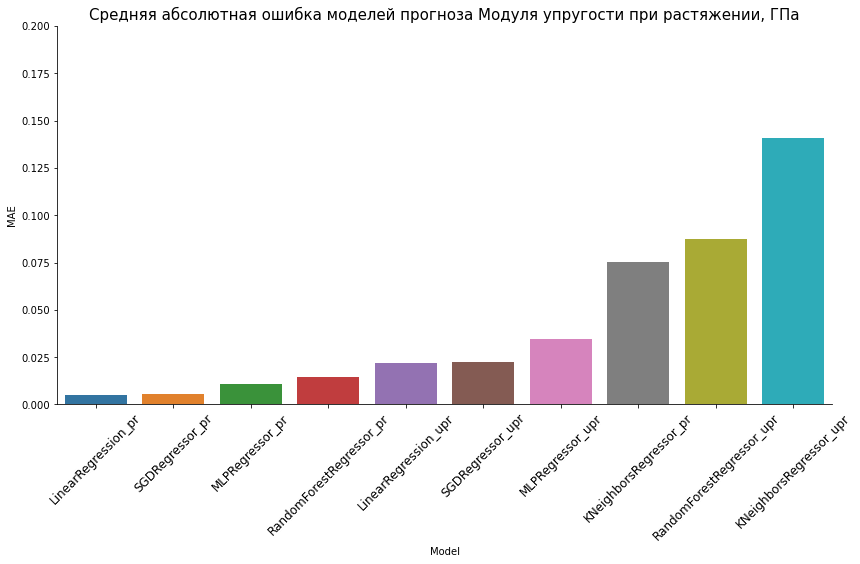

In [91]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Модуля упругости при растяжении, ГПа'
sns.catplot(data=models_sort[0:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

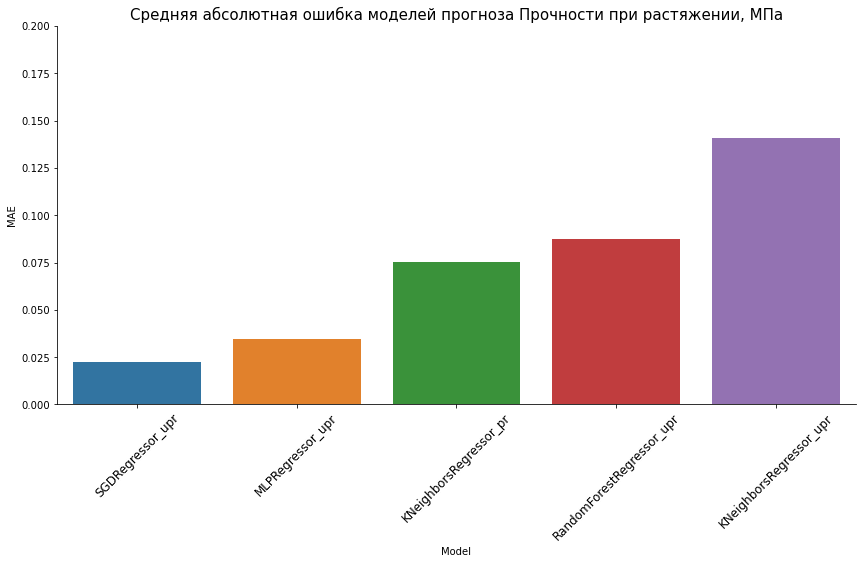

In [92]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Прочности при растяжении, МПа'
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

Вывод: средние ошибки моделей прогноза не более 0,2

###### Построение нейронной сети на Keras

Построение нейронной сети на Keras для предсказания следующих параметров: Модуль упругости при растяжении, Прочность при растяжении, Соотношение матрица-наполнитель.

In [129]:
# Загрузка библиотеки tensorflow
import tensorflow as tf
# Загрузка модуля keras библиотеки tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Вывод версии библиотеки tensorflow
print(tf.__version__)

2.11.0


- Нейронная сеть для прогноза параметра Модуль упругости при растяжении

In [130]:
# Создание слоя, который выполняет нормализацию входных объектов
normalizer = tf.keras.layers.Normalization(axis=-1)

In [131]:
# Создание слоя, который выполняет нормализацию входных объектов
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [132]:
# Вид модели - коллекция, стек слоев
model_upr = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr.add(Dense(256))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [133]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [134]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 6s 65ms/step - loss: 0.6295 - val_loss: 0.2399
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 0.2793 - val_loss: 0.1308
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.2404 - val_loss: 0.1668
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1895 - val_loss: 0.1452
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.1506 - val_loss: 0.1409
Epoch 6/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1371 - val_loss: 0.1366
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1293 - val_loss: 0.1337
Epoch 8/40
9/9 [==============================] - 0s 11ms/step - loss: 0.1310 - val_loss: 0.1369
Epoch 9/40
9/9 [==============================] - 0s 11ms/step - loss: 0.1265 - val_loss: 0.1316
Epoch 10/40
9/9 [==============================] - 0s 12ms/step - loss: 0.1157 - val_loss: 0.1332
Epoch 11/40
9/9 [===============

In [135]:
# Вывод архитектуры сети для upr
model_upr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               3840      
                                                                 
 batch_normalization_23 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_24 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 128)              

In [136]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

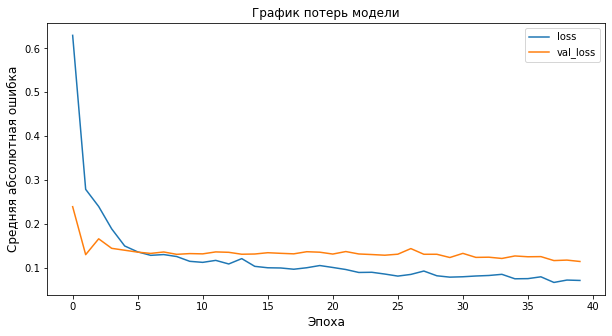

In [137]:
# Построение графика потерь модели
model_loss_plot(history_upr)

10/10 [==============================] - 1s 3ms/step


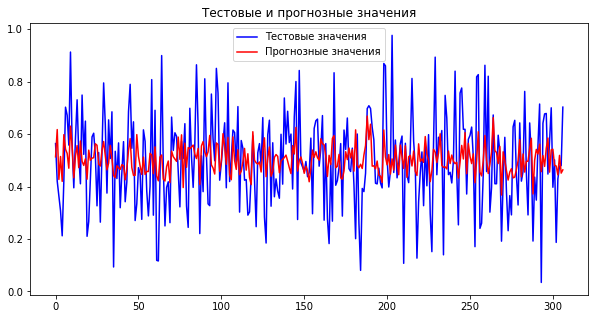

In [138]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

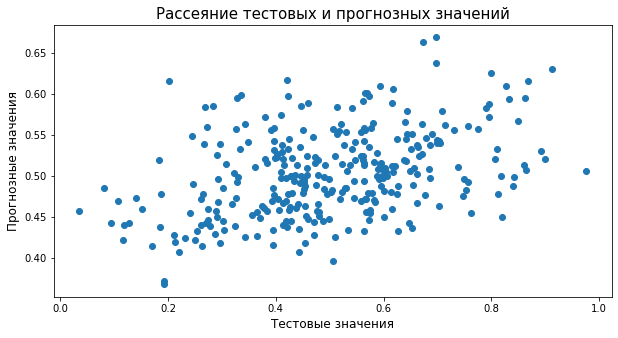

In [139]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [140]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.1298
Model MAE: 0.12978674471378326


In [141]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.142124
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для прогноза параметра Прочность при растяжении

In [142]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [143]:
# Вид модели - коллекция, стек слоев
model_pr = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [144]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [145]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [146]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
18/18 [==============================] - 4s 26ms/step - loss: 0.7968 - val_loss: 0.3818
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 0.4185 - val_loss: 0.2929
Epoch 3/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2593 - val_loss: 0.2426
Epoch 4/300
18/18 [==============================] - 0s 6ms/step - loss: 0.2244 - val_loss: 0.2152
Epoch 5/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1858 - val_loss: 0.1900
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1756 - val_loss: 0.1809
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1488 - val_loss: 0.1696
Epoch 8/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1541 - val_loss: 0.1577
Epoch 9/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1383 - val_loss: 0.1490
Epoch 10/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1350 - val_loss: 0.1414
Epoch 11

18/18 [==============================] - 0s 5ms/step - loss: 0.0565 - val_loss: 0.0385
Epoch 84/300
18/18 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0413
Epoch 85/300
18/18 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.0391
Epoch 86/300
18/18 [==============================] - 0s 5ms/step - loss: 0.0552 - val_loss: 0.0443
Epoch 87/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0564 - val_loss: 0.0454
Epoch 88/300
18/18 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.0396
Epoch 89/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.0500
Epoch 90/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0546 - val_loss: 0.0473
Epoch 91/300
18/18 [==============================] - 0s 5ms/step - loss: 0.0483 - val_loss: 0.0384
Epoch 92/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0512 - val_loss: 0.0354
Epoch 93/300


In [147]:
# Вывод архитектуры сети для pr
model_pr.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1920      
                                                                 
 batch_normalization_34 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_35 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 64)               

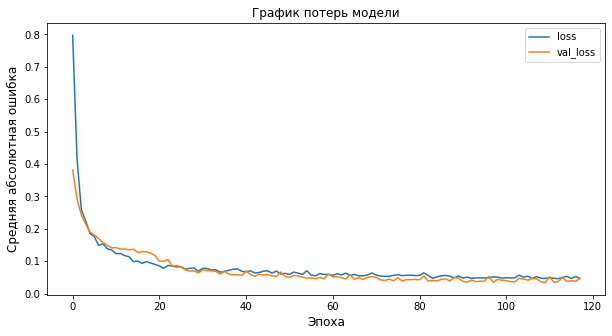

In [148]:
# Построение графика потерь модели
model_loss_plot(history_pr)

10/10 [==============================] - 0s 2ms/step


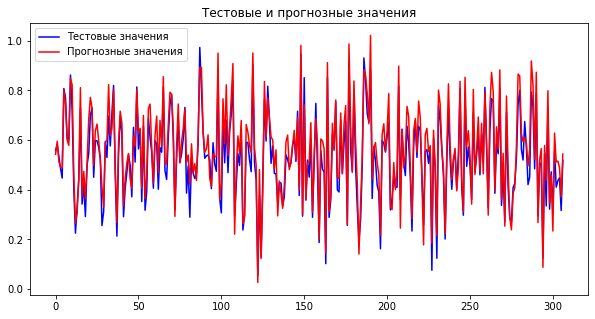

In [149]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

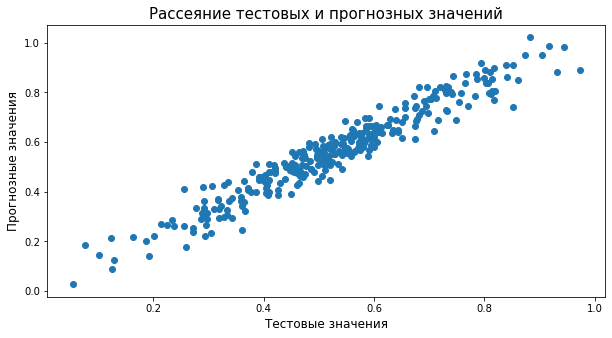

In [150]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [151]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.0484
Model MAE: 0.04839122295379639


In [152]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.133637
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для предсказания параметра Соотношение матрица-наполнитель

In [177]:
# Назначение переменных для создания модели
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]
# Разбиение данных на обучающую и тестовую выборки
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=5)

In [178]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [179]:
# Вид модели - коллекция, стек слоев
model_mn = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [180]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [181]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [182]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 4s 54ms/step - loss: 0.4534 - val_loss: 0.2549
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2390 - val_loss: 0.2251
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1970 - val_loss: 0.2009
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1694 - val_loss: 0.1885
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1637 - val_loss: 0.1928
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1573 - val_loss: 0.2075
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1521 - val_loss: 0.1940
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1407 - val_loss: 0.2047
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1409 - val_loss: 0.1736
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1463 - val_loss: 0.1835
Epoch 11/100
9/9 [=========

In [183]:
# Вывод архитектуры сети для mn
model_mn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               1920      
                                                                 
 batch_normalization_51 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_52 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_60 (Dense)            (None, 64)               

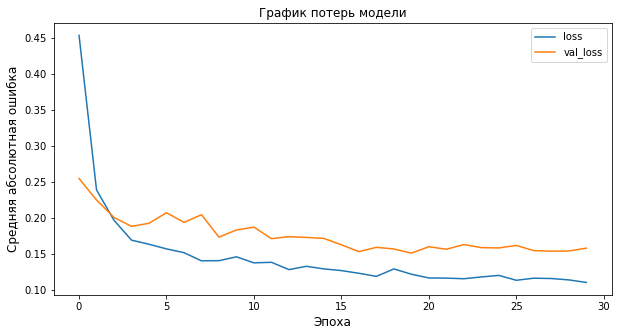

In [184]:
# Построение графика потерь модели
model_loss_plot(history_mn)

10/10 [==============================] - 1s 2ms/step


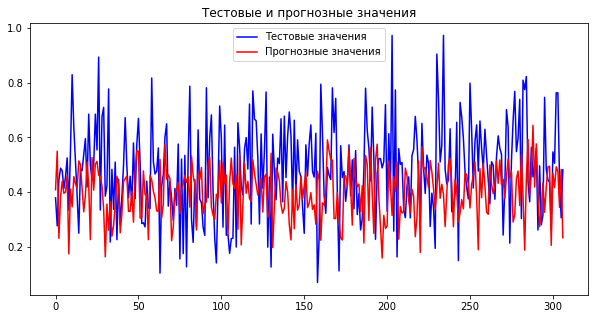

In [185]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

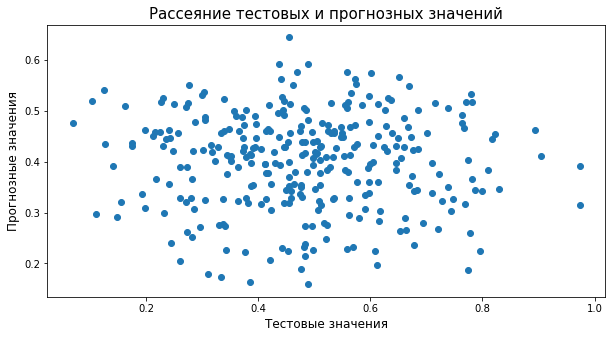

In [186]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [187]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

10/10 [==============================] - 0s 2ms/step - loss: 0.1688
Model MAE: 0.16882649064064026


In [188]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.13474
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
